In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/MyDrive/dataset_covid_2020.xlsx'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Carica il file Excel
data = pd.read_excel(file_path)

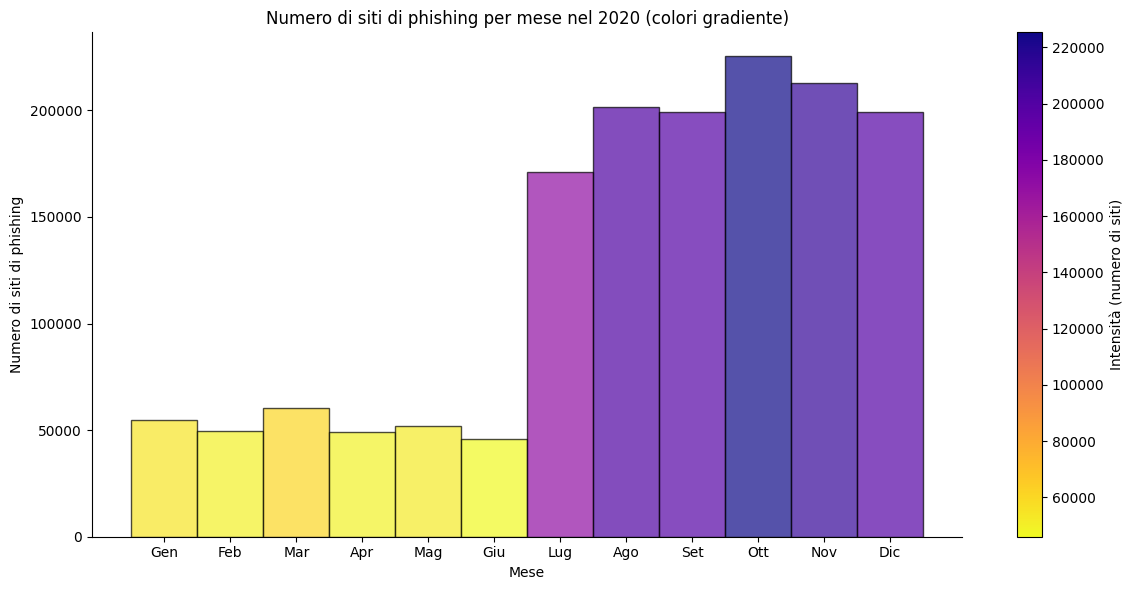

In [45]:

import numpy as np
from matplotlib.colors import Normalize

# Verifica e converti la colonna 'Mese' in stringhe
data['Mese'] = data['Mese'].astype(str)

# Ordina i mesi in modo cronologico (abbreviati)
month_order = [
    'Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu',
    'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'
]

# Assicurati che i valori in 'Mese' siano validi
data['Mese'] = pd.Categorical(data['Mese'], categories=month_order, ordered=True)

# Ordina i dati
data = data.sort_values('Mese')

# Numero di mesi
n_mesi = len(data['Mese'])

# Crea il grafico a barre
plt.figure(figsize=(12, 6))

# Imposta la larghezza delle barre
width = 1.0
x = np.arange(n_mesi)  # Posizioni delle barre

# Normalizza i dati per la colormap
norm = Normalize(vmin=data['Siti Phishing Identificati (Univoci)'].min(), vmax=data['Siti Phishing Identificati (Univoci)'].max())

# Scegli una colormap
colormap = plt.cm.plasma_r

# Applica la colormap alle barre
colors = colormap(norm(data['Siti Phishing Identificati (Univoci)']))

# Crea le barre con i colori gradiente
plt.bar(x, data['Siti Phishing Identificati (Univoci)'], width=width, color=colors, edgecolor='black', alpha=0.7)

# Imposta le etichette dei mesi sull'asse x (orizzontali)
plt.xticks(x, data['Mese'], rotation=0)

# Aggiungi etichette e titolo
plt.title('Numero di siti di phishing per mese nel 2020')
plt.xlabel('Mese')
plt.ylabel('Numero di siti di phishing')

# Aggiungi una colorbar per mostrare la scala dei colori
sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), label='Intensità (numero di siti)')

# Rimuovi i bordi destro e superiore
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

# Mostra il grafico
plt.show()
